# **IMPORT THƯ VIỆN**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from itertools import cycle
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
# import warnings
# warnings.filterwarnings("ignore", category=FutureWarning)


# **TẢI DỮ LIỆU**

Trường hợp tải file từ máy tính thì skip đến đoạn df = pd.read_csv('Social_Network_Ads.csv')

### **Tải dữ liệu từ Kaggle**

In [ ]:
# Tải kaggle để tải dữ liệu từ nó
!pip install -q kaggle
from google.colab import files
files.upload()

# Setup Kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Lệnh để check Kaggle
! kaggle dataset list

# Copy API từ Kaggle dataset website
!kaggle datasets download -d jahnveenarang/cvdcvd-vd

Saving kaggle.json to kaggle.json
usage: kaggle [-h] [-v] [-W] {competitions,c,datasets,d,kernels,k,models,m,files,f,config} ...
kaggle: error: argument command: invalid choice: 'dataset' (choose from 'competitions', 'c', 'datasets', 'd', 'kernels', 'k', 'models', 'm', 'files', 'f', 'config')
Dataset URL: https://www.kaggle.com/datasets/jahnveenarang/cvdcvd-vd
License(s): unknown
  0% 0.00/3.27k [00:00<?, ?B/s]
100% 3.27k/3.27k [00:00<00:00, 5.91MB/s]


In [ ]:
!unzip cvdcvd-vd.zip

Archive:  cvdcvd-vd.zip
  inflating: Social_Network_Ads.csv  


### **Tải dữ liệu từ Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dòng code cho việc xóa liên kết Drive

In [ ]:
drive.flush_and_unmount()

# **ĐỌC DỮ LIỆU**

Đọc dữ liệu từ directory của drive nếu tải dữ liệu từ Drive

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Social_Network_Ads.csv')

Đọc dữ liệu từ file
*  được giải nén qua việc tải dữ liệu từ Kaggle
*  được tải trực tiếp từ máy tính về

In [ ]:
df = pd.read_csv('Social_Network_Ads.csv')

# **KHÁM PHÁ DỮ LIỆU**

## In ra 10 dòng đầu tiên

In [ ]:
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


## **Thông tin tổng quan**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## **Thông kê mô tả**

In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


## **Phân bố giới tính với mức lương ước tính**

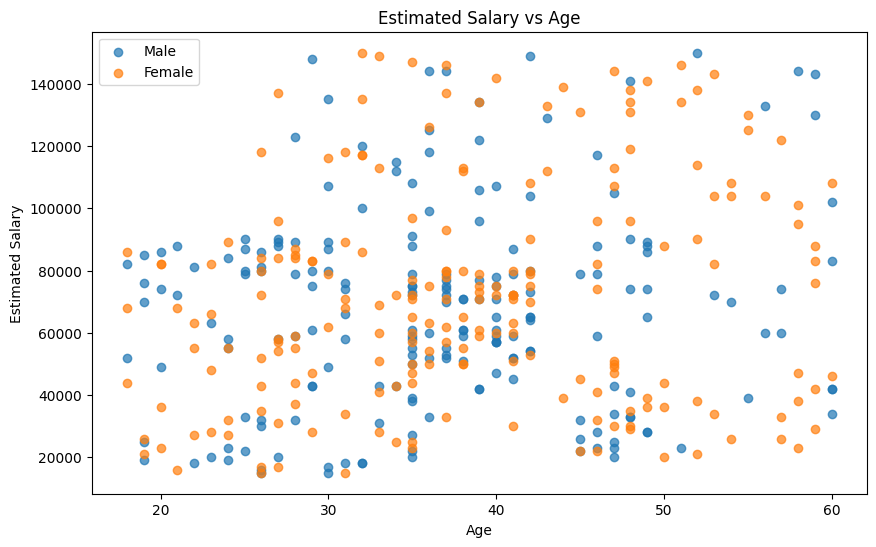

In [ ]:
plt.figure(figsize=(10, 6))

for gender in df['Gender'].unique():
    subset = df[df['Gender'] == gender]
    plt.scatter(subset['Age'], subset['EstimatedSalary'], label=gender, alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Estimated Salary vs Age')
_ = plt.legend()


## **Phân bố giới tính trong việc mua hàng sau khi nhấn vào quảng cáo**

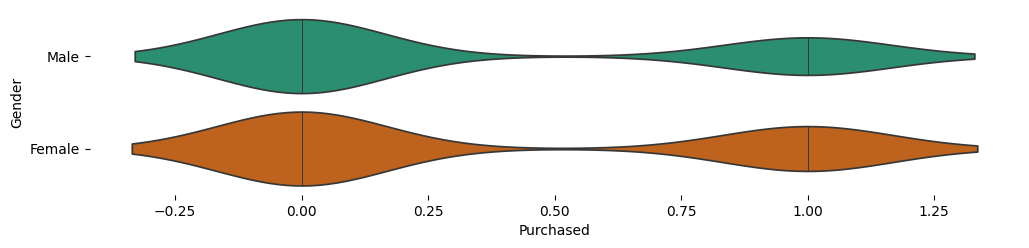

In [ ]:
figsize = (12, 1.2 * len(df['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Purchased', y='Gender', inner='stick', hue='Gender', palette='Dark2', legend=False)
sns.despine(top=True, right=True, bottom=True, left=True)


## **Biểu đồ phân tán độ tuổi so với mức lương ước tính theo giới tính**

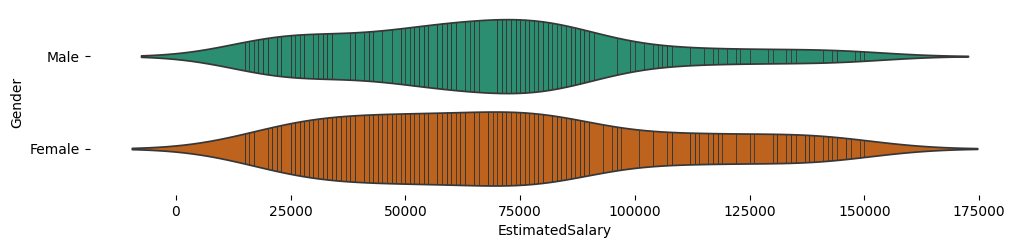

In [ ]:
figsize = (12, 1.2 * len(df['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='EstimatedSalary', y='Gender', inner='stick', hue='Gender', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## **Hiển thị số lượng mẫu của nhãn**

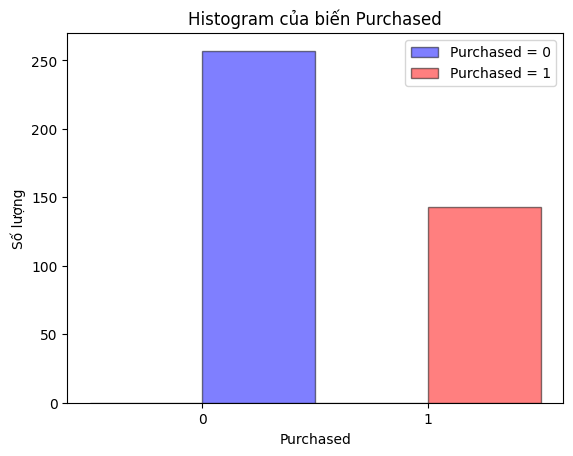

,count
Purchased,
0,257
1,143


In [ ]:
# Vẽ histogram cho biến Purchased
plt.hist(df[df['Purchased'] == 0]['Purchased'], bins=2, color='blue', label='Purchased = 0', alpha=0.5, edgecolor='black')
plt.hist(df[df['Purchased'] == 1]['Purchased'], bins=2, color='red', label='Purchased = 1', alpha=0.5, edgecolor='black')
plt.xlabel('Purchased')
plt.ylabel('Số lượng')
plt.title('Histogram của biến Purchased')
plt.xticks([0, 1])
plt.legend()
plt.show()
df['Purchased'].value_counts()

## **Biểu đồ tỉ lệ phần trăm của nhãn Purchased**

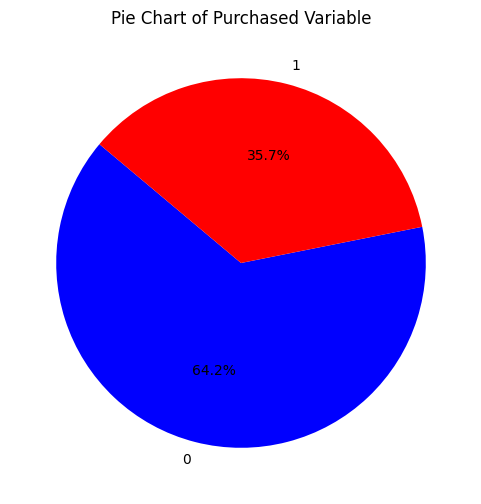

In [ ]:
counts = df['Purchased'].value_counts()

# Tạo biểu đồ tròn
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['blue', 'red'], startangle=140)
plt.title('Pie Chart of Purchased Variable')
plt.show()

## **Truy xuất các đặc trưng**

In [ ]:
numerical_features = df.select_dtypes(include=['int64', 'object'])
numerical_features.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

# **PHÂN TÍCH ĐƠN BIẾN**

Khám phá từng đặc trưng của thuộc tính

## **Histograms cho từng đặc trưng**

Tần suất của Age trong từng khoảng:
Age
(18.0, 22.2]    23
(22.2, 26.4]    37
(26.4, 30.6]    46
(30.6, 34.8]    35
(34.8, 39.0]    92
(39.0, 43.2]    50
(43.2, 47.4]    35
(47.4, 51.6]    31
(51.6, 55.8]    18
(55.8, 60.0]    28
Name: count, dtype: int64

Tần suất của EstimatedSalary trong từng khoảng:
EstimatedSalary
(15000.0, 28500.0]      47
(28500.0, 42000.0]      44
(42000.0, 55500.0]      53
(55500.0, 69000.0]      51
(69000.0, 82500.0]      81
(82500.0, 96000.0]      44
(96000.0, 109500.0]     18
(109500.0, 123000.0]    20
(123000.0, 136500.0]    16
(136500.0, 150000.0]    22
Name: count, dtype: int64



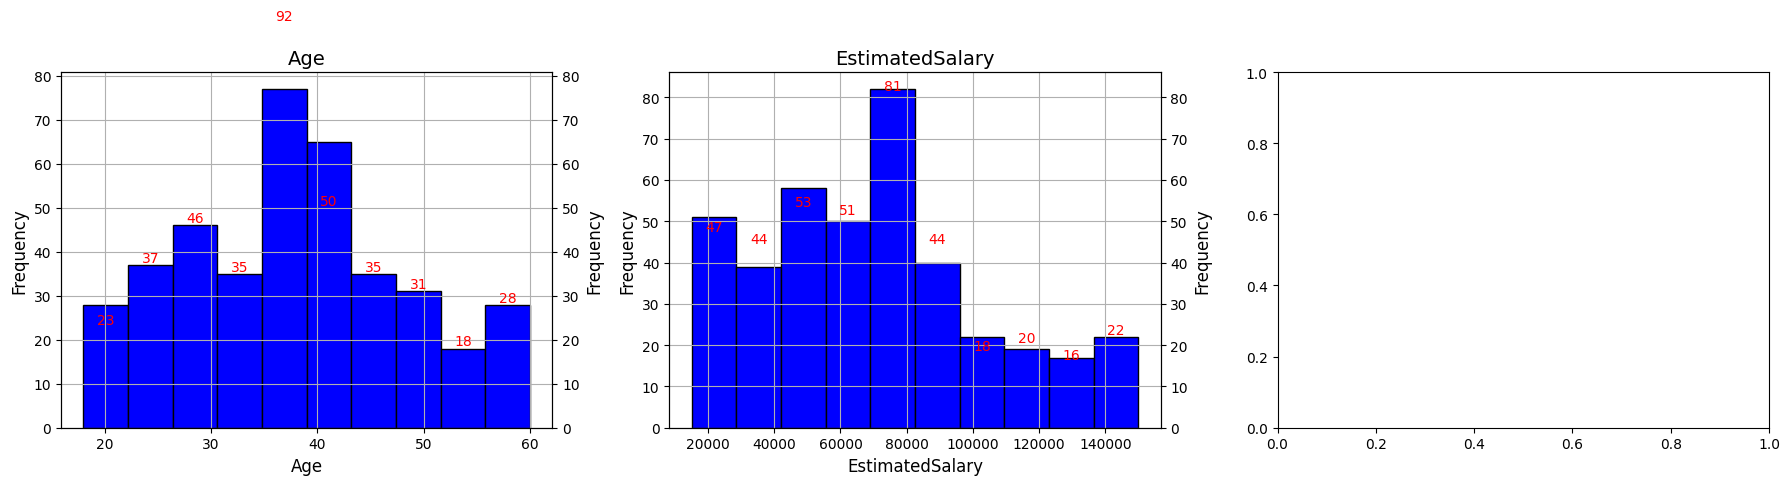

In [ ]:
#User ID	Gender	Age	EstimatedSalary	Purchased
numerical_features = ['Age', 'EstimatedSalary']

# Số lượng bins (khoảng) muốn chia cho mỗi đặc trưng
number_of_bins = 10

# Tạo một plot tổng thể cho các biểu đồ histogram
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    # Tạo khoảng (bins) và tính toán tần suất
    bins = np.linspace(df[feature].min(), df[feature].max(), number_of_bins + 1)
    binned_data = pd.cut(df[feature], bins=bins)
    frequency = binned_data.value_counts().sort_index()

    # In ra các tần suất
    print(f'Tần suất của {feature} trong từng khoảng:')
    print(frequency)
    print()

    # Vẽ biểu đồ histogram
    ax = axes[i]
    df[feature].hist(ax=ax, bins=bins, edgecolor='black', color='blue')
    ax.set_title(f'{feature}', fontsize=14)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

    # Vẽ trục y thứ hai cho tần suất
    ax2 = ax.twinx()
    ax2.set_ylim(ax.get_ylim())
    ax2.set_ylabel('Frequency', fontsize=12)

    # Hiển thị tần suất
    bin_centers = (bins[:-1] + bins[1:]) / 2
    for bin_center, freq in zip(bin_centers, frequency):
        ax2.text(bin_center, freq, str(freq), ha='center', va='bottom', fontsize=10, color='red')
plt.tight_layout()
plt.show()

## Biểu đồ boxplot cho từng đặc trưng

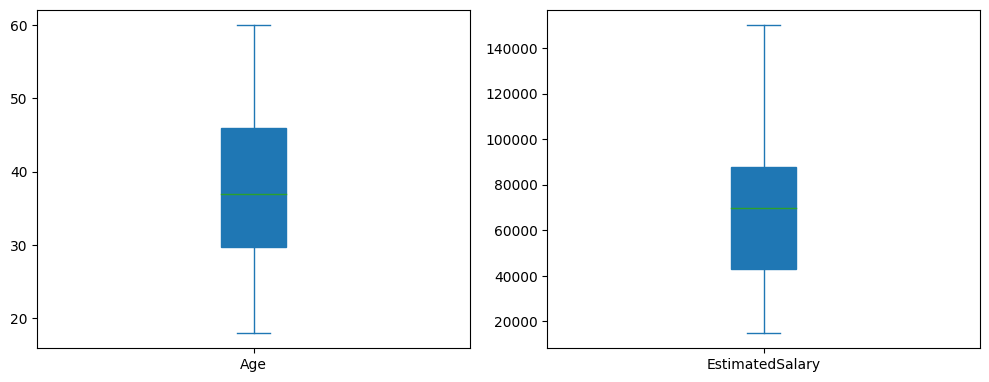

In [ ]:
# Danh sách các giá trị numerical
numerical_features = ['Age', 'EstimatedSalary']

# Vẽ biểu đồ hộp cho mỗi numerical (tính năng số)
df[numerical_features].plot(kind='box', subplots=True, layout=(4, 2), figsize=(10, 15), patch_artist=True)
plt.tight_layout()
plt.show()

## **Biểu đồ boxplot so sánh giá trị của các đặc trưng số với nhãn**

<ipython-input-5-b1d561fc3d93>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Purchased', y=feature, data=df, palette=my_pal) # str
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group 

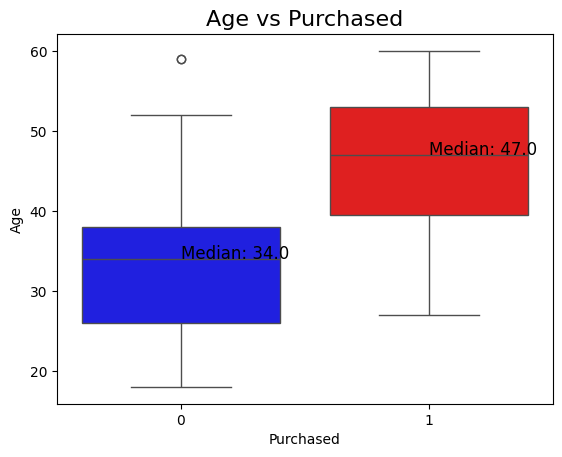

<ipython-input-5-b1d561fc3d93>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Purchased', y=feature, data=df, palette=my_pal) # str
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group 

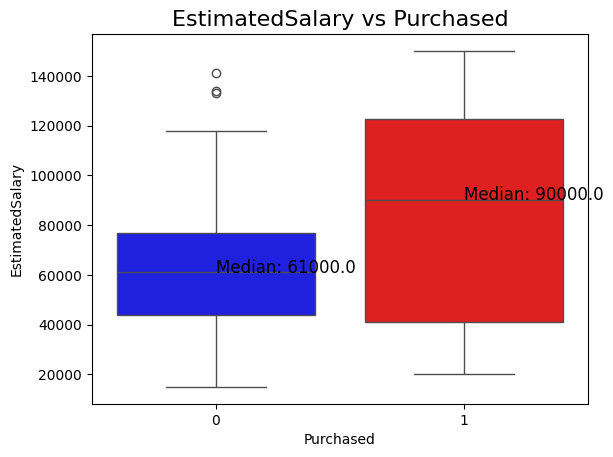

In [ ]:
numerical_features = ['Age', 'EstimatedSalary']

# Bảng màu cho hộp biểu đồ boxplot
# my_pal = {0: "blue", 1: "red"} # int
my_pal = {"0": "blue", "1": "red"} # str

for feature in numerical_features:
    # Vẽ boxplot
    # sns.boxplot(x='Purchased', y=feature, data=df, hue='Purchased', palette=my_pal, dodge=False) # int
    sns.boxplot(x='Purchased', y=feature, data=df, palette=my_pal) # str

    # Tính toán và hiển thị trung vị
    median_0 = df[df['Purchased'] == 0][feature].median()
    median_1 = df[df['Purchased'] == 1][feature].median()
    plt.text(0, median_0, f'Median: {median_0}', color='black', ha='left', fontsize=12)
    plt.text(1, median_1, f'Median: {median_1}', color='black', ha='left', fontsize=12)
    # Đặt tiêu đề cho biểu đồ
    plt.title(f'{feature} vs Purchased', fontsize=16)
    # Hiển thị biểu đồ
    plt.show()


# **PHÂN TÍCH ĐA BIẾN**

Khám phá mối quan hệ, các đặc trưng giữa các thuộc tính

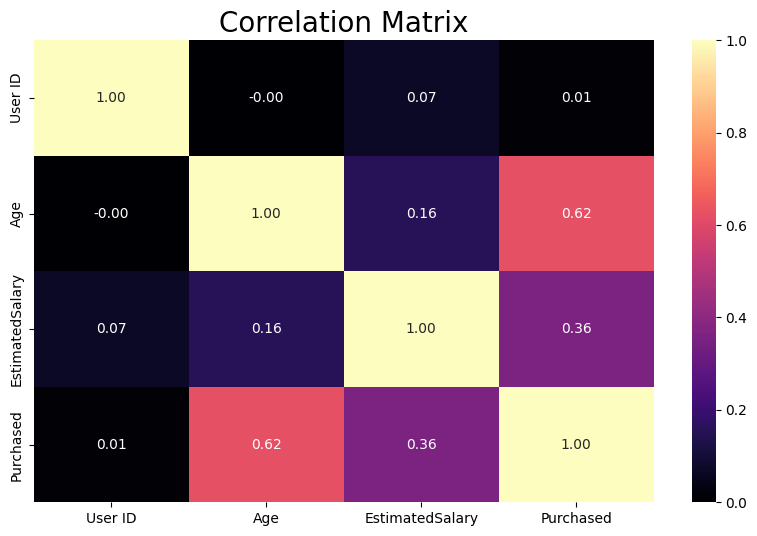

In [ ]:
# Correlation matrix
f, ax = plt.subplots(figsize=[10, 6])
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

# **TIỀN XỬ LÝ DỮ LIỆU**

Trong việc tạo mô hình huấn luyện, việc xây dựng tiền xử lý dữ liệu (Preprocessing) là cực kỳ quan trọng. Cụ thể là kiểm tra và chỉnh sửa, loại trừ, tích hợp, thay đổi các đặc trưng của dữ liệu sao cho phù hợp để huấn luyện mô hình.

## Kiểm tra dữ liệu bị trùng lặp

In [ ]:
duplicated_rows = df[df.duplicated()]
print("Các hàng trùng lặp:")
print(duplicated_rows)
# Xóa các hàng trùng
df_cleaned = df.drop_duplicates()

Các hàng trùng lặp:
Empty DataFrame
Columns: [User ID, Gender, Age, EstimatedSalary, Purchased]
Index: []


## Kiểm tra dữ liệu bị thiếu

In [ ]:
numerical_features = ['Age', 'EstimatedSalary']
# Kiểm tra dữ liệu bị thiếu
missing_data = df[numerical_features].isnull().sum()
print("Dữ liệu bị thiếu:")
print(missing_data)
# Điền giá trị bị thiếu bằng giá trị trung vị cho các đặc trưng số
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].median())

Dữ liệu bị thiếu:
Age                0
EstimatedSalary    0
dtype: int64


## Kiểm tra giá trị bất thường, xử lý giá trị bằng 0 và nhỏ hơn

Những giá trị lỗi sẽ cản trở mô hình, vì nó có thể gây nhiễu và trở nên quá phức tạp cho mô hình học hỏi. Vì thế loại bỏ hoặc biến những giá trị đó thành các giá trị mới không bị lỗi.

In [ ]:
cols= df[['Age','EstimatedSalary']]
for col in cols:
    zero_values = len(df[df[col] <= 0])
    print("Number of zero or less tha zero values in column {} are {}".format(col,zero_values))

Number of zero or less tha zero values in column Age are 0
Number of zero or less tha zero values in column EstimatedSalary are 0


In [ ]:
# Thay thế các giá trị bằng 0 hoặc nhỏ hơn 0 bằng giá trị trung vị
cols= df[['Age','EstimatedSalary']]
for col in cols:
    median = df[col].median()
    df.loc[df[col]<=0,col] = median

## Loại bỏ những giá trị ngoại lai

Giá trị ngoại lai là những giá trị khác thường nằm ngoài phạm vi dữ liệu thông thường, có thể làm méo mó dữ liệu, thường do thu thập không chính xác, không đầy đủ hoặc biến đổi tự nhiên một cách bất thường. Nhưng những giá trị này khác với giá trị lỗi, có thể chỉnh sửa, loại bỏ hoặc giữ lại nguyên vẹn.

In [ ]:
numerical_features = ['Age','EstimatedSalary']
# Loại bỏ giá trị ngoại lai
def remove_outliers(df, numerical_features):
    df_clean = df.copy()
    for feature in numerical_features:
        Q1 = df_clean[feature].quantile(0.25)
        Q3 = df_clean[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[feature] >= lower_bound) & (df_clean[feature] <= upper_bound)]
    return df_clean
df_clean = remove_outliers(df, numerical_features)

Số lượng mẫu còn lại sau khi đã loại bỏ ngoại lai

In [ ]:
# Kiểm tra số lượng mẫu trong DataFrame df_clean
num_samples = df_clean.shape[0]
print("Số lượng mẫu trong DataFrame df_clean là:", num_samples)


Số lượng mẫu trong DataFrame df_clean là: 400


# **HUẤN LUYỆN**

## **Chuẩn bị dữ liệu huấn luyện**

In [ ]:
X = df_clean.drop("Purchased", axis=1)
y = df_clean["Purchased"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(300, 4) (100, 4) (300,) (100,)


## **Xem xét và loại bỏ thuộc tính dư thừa**

### **Xem xét và loại bỏ thuộc tính tương quan cao qua Ma trận tương quan**

*Xem hình ảnh ma trận ở Mục Lục: PHÂN TÍCH ĐA BIẾN*

Chức năng xóa thuộc tính tự động 1 thuộc tính trong 1 cặp thuộc tính nếu 1 cặp thuộc tính đó vượt ngưỡng tương quan cho phép

Hoặc loại bỏ thuộc tính thủ công bằng **df = df.drop("{thuộc tính}", axis=1)**

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Tập hợp các thuộc tính đã bị xóa
    corr_matrix = dataset.corr(numeric_only=True) # Chỉ lấy thuộc tính dạng numeric
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # Lấy tên cột bị xóa
                col_corr.add(colname)
    return col_corr

In [ ]:
features_remove=correlation(X_train,0.7)
print(features_remove)

set()


Dựa vào ma trận tương quan (Correlation Matrix) ở Mục lục: PHÂN TÍCH ĐA BIẾN, vì không có thuộc tính nào trên mức ngưỡng nên nó sẽ không trả về thuộc tính nào hết.

In [ ]:
X_train.drop(features_remove,axis=1)

,Gender,Age,EstimatedSalary
247,Female,57,122000
110,Female,39,71000
16,Male,47,25000
66,Male,24,19000
153,Female,36,50000
...,...,...,...
71,Female,24,27000
106,Female,26,35000
270,Female,43,133000
348,Male,39,77000


In [ ]:
X_test.drop(features_remove,axis=1)

,User ID,Gender,Age,EstimatedSalary
209,15697424,Female,46,22000
280,15609669,Female,59,88000
33,15776733,Female,28,44000
210,15724536,Female,48,96000
93,15699284,Female,29,28000
...,...,...,...,...
314,15747097,Female,39,79000
373,15708791,Male,59,130000
380,15683758,Male,42,64000
239,15772073,Female,53,143000


Nếu có thuộc tính được trả về, nghĩa là cặp tương quan giữa 2 thuộc tính đó trên mức ngưỡng, thì 1 trong số chúng (thuộc tính được trả về) sẽ bị loại bỏ.

In [ ]:
y_train

,Purchased
247,1
110,0
16,1
66,0
153,0
...,...
71,0
106,0
270,0
348,0


In [ ]:
y_test

,Purchased
209,0
280,1
33,0
210,1
93,0
...,...
314,0
373,1
380,0
239,1


### **Xem xét và loại bỏ thuộc tính không quan trọng**

Mặc dù UserID trong Ma trận tương quan không có mối tương quan cao với các thuộc tính khác, nhưng đây được tính là thuộc tính dư thừa vì nó tương tự với ID thông thường, không hề quan trọng như Gender, EstimatedSalary và Age. Nó được xem như là Index để sắp xếp, không hữu ích cho mô hình huấn luyện, hơn nữa nó sẽ cản trở quá trình dự đoán của API (đặc biệt là dữ liệu mã hóa/chuẩn hóa vì nó sẽ đè những dữ liệu khác dẫn đến không đoán chính xác).

Vì thế, trong quá trình huấn luyện, trước khi mã hóa, chuẩn hóa sẽ phải loại bỏ các thuộc tính dư thừa.

In [ ]:
X_train = X_train.drop('User ID',axis=1)
X_test = X_test.drop('User ID',axis=1)

In [ ]:
X_train

,Gender,Age,EstimatedSalary
247,Female,57,122000
110,Female,39,71000
16,Male,47,25000
66,Male,24,19000
153,Female,36,50000
...,...,...,...
71,Female,24,27000
106,Female,26,35000
270,Female,43,133000
348,Male,39,77000


In [ ]:
X_test

## **Mã hóa/Định nghĩa cho các thuộc tính phân loại (one-hot encoding categorical features)**

Trong dữ liệu, có những thuộc tính không phải là dữ liệu số, vì thế chuyển đổi các thuộc tính phân loại (categorical features) thành dạng số (numerical format) để có thể sử dụng chúng trong các mô hình học máy như Random Forest, Logistic Regression, Decision Tree, SVM (Support Vector Machine).

In [ ]:
categorical_features = ['Gender']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

In [ ]:
X_train_encoded

array([[1.00e+00, 0.00e+00, 5.70e+01, 1.22e+05],
       [1.00e+00, 0.00e+00, 3.90e+01, 7.10e+04],
       [0.00e+00, 1.00e+00, 4.70e+01, 2.50e+04],
       ...,
       [1.00e+00, 0.00e+00, 4.30e+01, 1.33e+05],
       [0.00e+00, 1.00e+00, 3.90e+01, 7.70e+04],
       [1.00e+00, 0.00e+00, 3.20e+01, 8.60e+04]])

In [ ]:
X_test_encoded

array([[1.00e+00, 0.00e+00, 4.60e+01, 2.20e+04],
       [1.00e+00, 0.00e+00, 5.90e+01, 8.80e+04],
       [1.00e+00, 0.00e+00, 2.80e+01, 4.40e+04],
       [1.00e+00, 0.00e+00, 4.80e+01, 9.60e+04],
       [1.00e+00, 0.00e+00, 2.90e+01, 2.80e+04],
       [1.00e+00, 0.00e+00, 3.00e+01, 6.20e+04],
       [1.00e+00, 0.00e+00, 4.70e+01, 1.07e+05],
       [1.00e+00, 0.00e+00, 2.90e+01, 8.30e+04],
       [0.00e+00, 1.00e+00, 4.00e+01, 7.50e+04],
       [0.00e+00, 1.00e+00, 4.20e+01, 6.50e+04],
       [1.00e+00, 0.00e+00, 3.50e+01, 6.50e+04],
       [1.00e+00, 0.00e+00, 5.30e+01, 3.40e+04],
       [1.00e+00, 0.00e+00, 2.30e+01, 4.80e+04],
       [1.00e+00, 0.00e+00, 2.00e+01, 2.30e+04],
       [0.00e+00, 1.00e+00, 3.00e+01, 8.70e+04],
       [0.00e+00, 1.00e+00, 3.50e+01, 1.08e+05],
       [1.00e+00, 0.00e+00, 5.20e+01, 3.80e+04],
       [1.00e+00, 0.00e+00, 4.60e+01, 7.40e+04],
       [0.00e+00, 1.00e+00, 3.90e+01, 4.20e+04],
       [0.00e+00, 1.00e+00, 5.60e+01, 6.00e+04],
       [1.00e+00, 0.

# **MÔ HÌNH**

Mô hình cơ bản không có tùy chỉnh tham số

## **DecisionTreeClassifier**



Độ chính xác trung bình của Decision Tree: 0.86
Độ chính xác của mô hình Decision Tree: 0.87


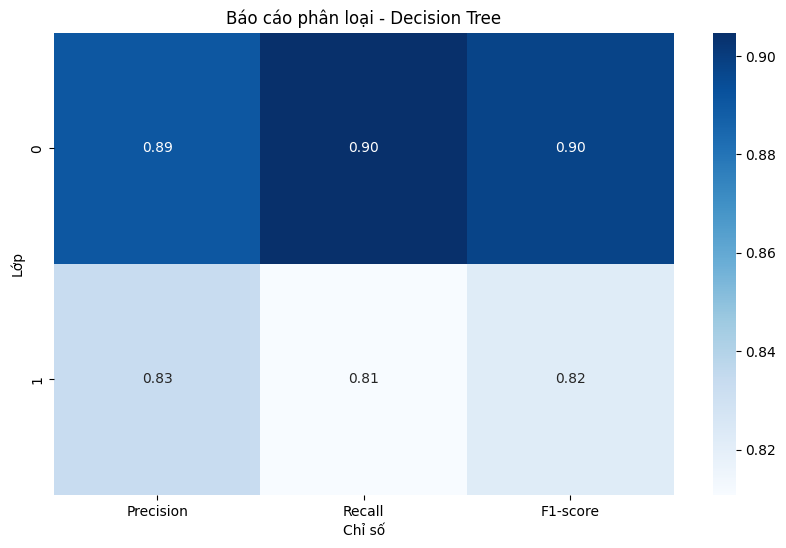

In [ ]:
# Khởi tạo và huấn luyện mô hình Decision Tree
best_model_tree = DecisionTreeClassifier(random_state=42)
best_model_tree.fit(X_train_encoded, y_train)

# Lưu mô hình Decision Tree
with open('decision_tree_optimized.pkl', 'wb') as f:
    pickle.dump(best_model_tree, f)

# Dự đoán trên tập test cho Decision Tree
y_pred_tree = best_model_tree.predict(X_test_encoded)

# Đánh giá mô hình bằng cross-validation cho Decision Tree
scores_tree = cross_val_score(best_model_tree, X_train_encoded, y_train, cv=5, n_jobs=-1)
print("Độ chính xác trung bình của Decision Tree:", scores_tree.mean())

# Tính độ chính xác cho Decision Tree
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Độ chính xác của mô hình Decision Tree:", accuracy_tree)

# Tạo báo cáo phân loại cho Decision Tree
report_tree = classification_report(y_test, y_pred_tree, output_dict=True)

# Vẽ biểu đồ heatmap từ báo cáo phân loại cho Decision Tree
labels_tree = list(report_tree.keys())[:-3]
data_tree = [[report_tree[label]['precision'], report_tree[label]['recall'], report_tree[label]['f1-score']] for label in labels_tree]
data_array_tree = np.array(data_tree)

plt.figure(figsize=(10, 6))
sns.heatmap(data_array_tree, annot=True, fmt=".2f", xticklabels=['Precision', 'Recall', 'F1-score'], yticklabels=labels_tree, cmap='Blues')
plt.xlabel('Chỉ số')
plt.ylabel('Lớp')
plt.title('Báo cáo phân loại - Decision Tree')
plt.show()


## **RandomForestClassifier**

Độ chính xác trung bình của Random Forest: 0.9099999999999999
Độ chính xác của mô hình Random Forest: 0.92


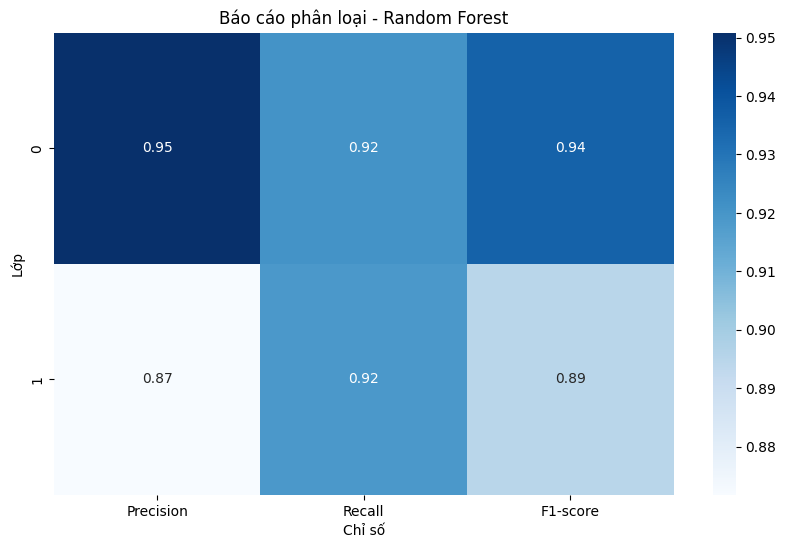

In [ ]:
best_model_rf = RandomForestClassifier(n_estimators=120, random_state=42)
best_model_rf.fit(X_train_encoded, y_train)

# Lưu mô hình
with open('random_forest_optimized.pkl', 'wb') as f:
    pickle.dump(best_model_rf, f)

# Dự đoán trên tập test
y_pred_rf = best_model_rf.predict(X_test_encoded)

# Đánh giá mô hình bằng cross-validation
scores_rf = cross_val_score(best_model_rf, X_train_encoded, y_train, cv=5, n_jobs=-1)
print("Độ chính xác trung bình của Random Forest:", scores_rf.mean())

# Tính độ chính xác
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Độ chính xác của mô hình Random Forest:", accuracy_rf)

# Tạo báo cáo phân loại cho Random Forest
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Vẽ biểu đồ heatmap từ báo cáo phân loại cho Random Forest
labels_rf = list(report_rf.keys())[:-3]
data_rf = [[report_rf[label]['precision'], report_rf[label]['recall'], report_rf[label]['f1-score']] for label in labels_rf]
data_array_rf = np.array(data_rf)

plt.figure(figsize=(10, 6))
sns.heatmap(data_array_rf, annot=True, fmt=".2f", xticklabels=['Precision', 'Recall', 'F1-score'], yticklabels=labels_rf, cmap='Blues')
plt.xlabel('Chỉ số')
plt.ylabel('Lớp')
plt.title('Báo cáo phân loại - Random Forest')
plt.show()

## **LogisticRegression**

Độ chính xác trung bình của LogisticRegression: 0.8233333333333333
Độ chính xác của mô hình LogisticRegression: 0.88


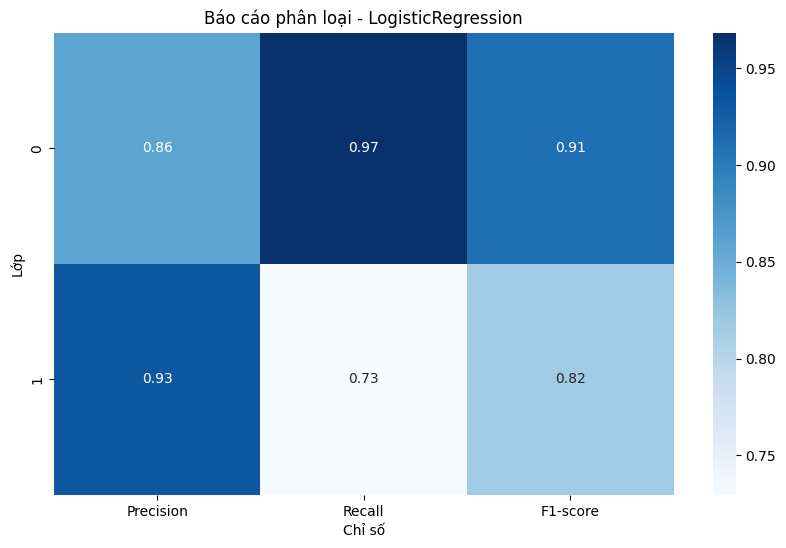

In [ ]:
best_model_logistic = LogisticRegression(C=10, max_iter=500, penalty='l2', random_state=42, solver='lbfgs')
best_model_logistic.fit(X_train_encoded, y_train)

# Lưu mô hình
with open('logistic_optimized.pkl', 'wb') as f:
    pickle.dump(best_model_logistic, f)

# Dự đoán trên tập test cho LogisticRegression
y_pred_logistic = best_model_logistic.predict(X_test_encoded)

# Đánh giá mô hình bằng cross-validation cho LogisticRegression
scores_logistic = cross_val_score(best_model_logistic, X_train_encoded, y_train, cv=5, n_jobs=-1)
print("Độ chính xác trung bình của LogisticRegression:", scores_logistic.mean())

# Tính độ chính xác cho LogisticRegression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Độ chính xác của mô hình LogisticRegression:", accuracy_logistic)

# Tạo báo cáo phân loại cho LogisticRegression
report_logistic = classification_report(y_test, y_pred_logistic, output_dict=True)

# Vẽ biểu đồ heatmap từ báo cáo phân loại cho LogisticRegression
labels_logistic = list(report_logistic.keys())[:-3]
data_logistic = [[report_logistic[label]['precision'], report_logistic[label]['recall'], report_logistic[label]['f1-score']] for label in labels_logistic]
data_array_logistic = np.array(data_logistic)

plt.figure(figsize=(10, 6))
sns.heatmap(data_array_logistic, annot=True, fmt=".2f", xticklabels=['Precision', 'Recall', 'F1-score'], yticklabels=labels_logistic, cmap='Blues')
plt.xlabel('Chỉ số')
plt.ylabel('Lớp')
plt.title('Báo cáo phân loại - LogisticRegression')
plt.show()

## **XGBoost**

Độ chính xác trung bình của XGBoost: 0.8800000000000001
Độ chính xác của mô hình XGBoost: 0.84


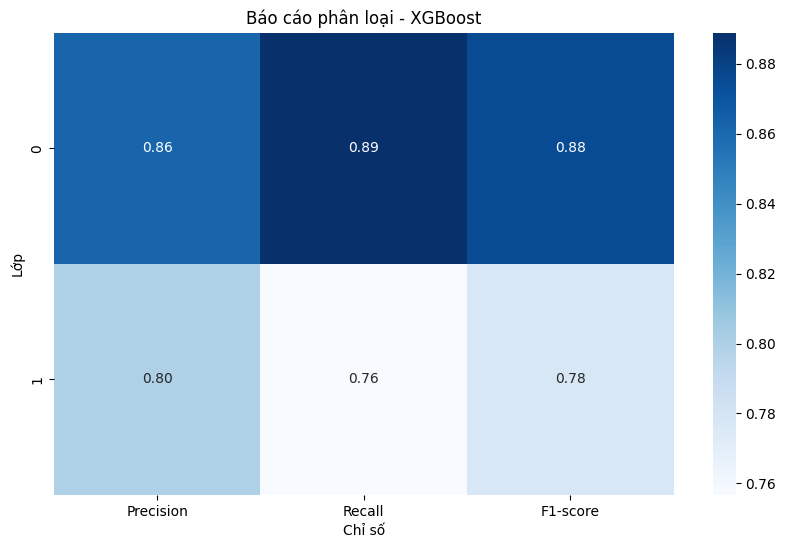

In [ ]:
best_model_xgb = xgb.XGBClassifier(n_estimators=120, random_state=42)
best_model_xgb.fit(X_train_encoded, y_train)

# Lưu mô hình XGBoost
with open('xgboost_optimized.pkl', 'wb') as f:
    pickle.dump(best_model_xgb, f)

# Dự đoán trên tập test
y_pred_xgb = best_model_xgb.predict(X_test_encoded)

# Đánh giá mô hình bằng cross-validation
scores_xgb = cross_val_score(best_model_xgb, X_train_encoded, y_train, cv=5, n_jobs=-1)
print("Độ chính xác trung bình của XGBoost:", scores_xgb.mean())

# Tính độ chính xác
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Độ chính xác của mô hình XGBoost:", accuracy_xgb)

# Tạo báo cáo phân loại cho XGBoost
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)

# Vẽ biểu đồ heatmap từ báo cáo phân loại cho XGBoost
labels_xgb = list(report_xgb.keys())[:-3]
data_xgb = [[report_xgb[label]['precision'], report_xgb[label]['recall'], report_xgb[label]['f1-score']] for label in labels_xgb]
data_array_xgb = np.array(data_xgb)

plt.figure(figsize=(10, 6))
sns.heatmap(data_array_xgb, annot=True, fmt=".2f", xticklabels=['Precision', 'Recall', 'F1-score'], yticklabels=labels_xgb, cmap='Blues')
plt.xlabel('Chỉ số')
plt.ylabel('Lớp')
plt.title('Báo cáo phân loại - XGBoost')
plt.show()

## **SVM (Support Vector Machine)**

Độ chính xác trung bình của SVM: 0.6466666666666666
Độ chính xác của mô hình SVM: 0.63


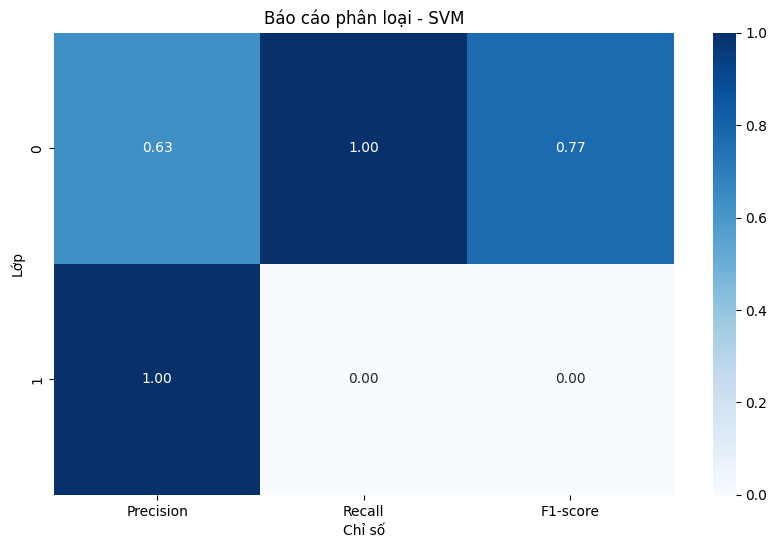

In [ ]:
best_model_svm = SVC(C=1.0, kernel='rbf', random_state=42)
best_model_svm.fit(X_train_encoded, y_train)

# Lưu mô hình SVM
with open('svm_optimized.pkl', 'wb') as f:
    pickle.dump(best_model_svm, f)

# Dự đoán trên tập test
y_pred_svm = best_model_svm.predict(X_test_encoded)

# Đánh giá mô hình bằng cross-validation
scores_svm = cross_val_score(best_model_svm, X_train_encoded, y_train, cv=5, n_jobs=-1)
print("Độ chính xác trung bình của SVM:", scores_svm.mean())

# Tính độ chính xác
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Độ chính xác của mô hình SVM:", accuracy_svm)

# Tạo báo cáo phân loại cho SVM
report_svm = classification_report(y_test, y_pred_svm, zero_division=1,output_dict=True)

# Vẽ biểu đồ heatmap từ báo cáo phân loại cho SVM
labels_svm = list(report_svm.keys())[:-3]
data_svm = [[report_svm[label]['precision'], report_svm[label]['recall'], report_svm[label]['f1-score']] for label in labels_svm]
data_array_svm = np.array(data_svm)

plt.figure(figsize=(10, 6))
sns.heatmap(data_array_svm, annot=True, fmt=".2f", xticklabels=['Precision', 'Recall', 'F1-score'], yticklabels=labels_svm, cmap='Blues')
plt.xlabel('Chỉ số')
plt.ylabel('Lớp')
plt.title('Báo cáo phân loại - SVM')
plt.show()

# ***CẢI THIỆN MÔ HÌNH***

## ***+SMOTE + RANDOMIZEDSEARCHCV***

Cân bằng dữ liệu (Synthetic Minority Over-sampling Technique/SMOTE) (Tùy chọn)

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_encoded, y_train)

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
smote = BorderlineSMOTE(k_neighbors=5, kind='borderline-1', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_encoded, y_train)

### **DecisionTreeClassifier**

Độ chính xác trung bình của Decision Tree: 0.9018981018981019
Độ chính xác của mô hình Decision Tree: 0.87


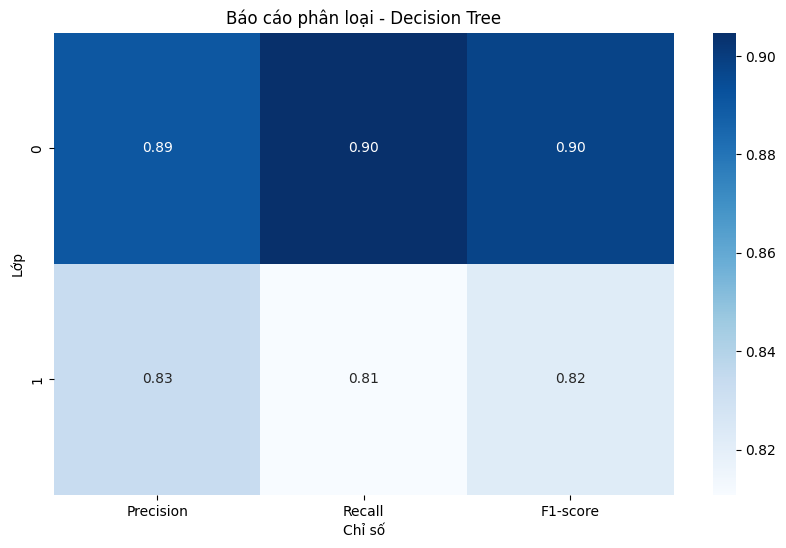

In [ ]:
dt_param = {
    'max_depth': [4],
    'min_samples_split': [2],
    'min_samples_leaf': [3]
}

# Vì tổ hợp tham số chỉ có 1, cụ thể là các tham số trong param, nên sẽ có n_iter=1 trong RandomizedSearchCV
dt_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), dt_param, cv=5, scoring='accuracy', n_jobs=-1, n_iter=1)
dt_search.fit(X_resampled, y_resampled)

best_model_dt = dt_search.best_estimator_

# Lưu mô hình
with open('decision_tree_optimized.pkl', 'wb') as f: #
    pickle.dump(best_model_dt, f)

# Dự đoán trên tập test
y_pred_dt = best_model_dt.predict(X_test_encoded)

# Đánh giá mô hình bằng cross-validation
scores_dt = cross_val_score(best_model_dt, X_resampled, y_resampled, cv=5, n_jobs=-1)
print("Độ chính xác trung bình của Decision Tree:", scores_dt.mean())

# Tính độ chính xác
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Độ chính xác của mô hình Decision Tree:", accuracy_dt)

# Tạo báo cáo phân loại cho Decision Tree
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)

# Vẽ biểu đồ heatmap từ báo cáo phân loại cho Decision Tree
labels_dt = list(report_dt.keys())[:-3]
data_dt = [[report_dt[label]['precision'], report_dt[label]['recall'], report_dt[label]['f1-score']] for label in labels_dt]
data_array_dt = np.array(data_dt)

plt.figure(figsize=(10, 6))
sns.heatmap(data_array_dt, annot=True, fmt=".2f", xticklabels=['Precision', 'Recall', 'F1-score'], yticklabels=labels_dt, cmap='Blues')
plt.xlabel('Chỉ số')
plt.ylabel('Lớp')
plt.title('Báo cáo phân loại - Decision Tree')
plt.show()

### **RandomForestClassifier**

Độ chính xác trung bình của Random Forest: 0.9174159174159173
Độ chính xác của mô hình Random Forest: 0.92


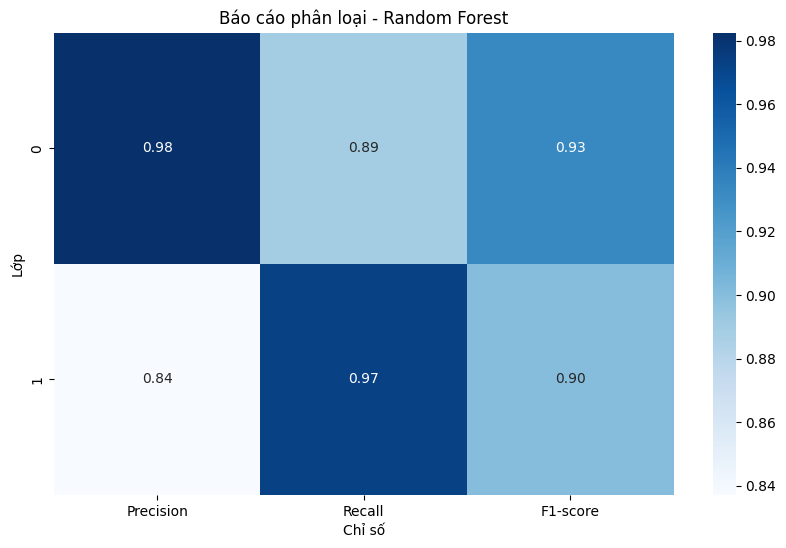

In [ ]:
rf_param = {
    'n_estimators': [150, 200, 250],
    'max_depth': [10, 15, 20],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [4, 10],
    'max_features': ['log2', 'sqrt'],
    'bootstrap': [True],
    'class_weight': ['balanced']
}
rf_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_param, cv=5, scoring='accuracy', n_jobs=-1)
rf_search.fit(X_resampled, y_resampled)

best_model_rf = rf_search.best_estimator_

# Lưu mô hình
with open('random_forest_optimized.pkl', 'wb') as f:
    pickle.dump(best_model_rf, f)

# Dự đoán trên tập test
y_pred_rf = best_model_rf.predict(X_test_encoded)

# Đánh giá mô hình bằng cross-validation
scores_rf = cross_val_score(best_model_rf, X_resampled, y_resampled, cv=5, n_jobs=-1)
print("Độ chính xác trung bình của Random Forest:", scores_rf.mean())

# Tính độ chính xác
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Độ chính xác của mô hình Random Forest:", accuracy_rf)

# Tạo báo cáo phân loại cho Random Forest
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Vẽ biểu đồ heatmap từ báo cáo phân loại cho Random Forest
labels_rf = list(report_rf.keys())[:-3]
data_rf = [[report_rf[label]['precision'], report_rf[label]['recall'], report_rf[label]['f1-score']] for label in labels_rf]
data_array_rf = np.array(data_rf)

plt.figure(figsize=(10, 6))
sns.heatmap(data_array_rf, annot=True, fmt=".2f", xticklabels=['Precision', 'Recall', 'F1-score'], yticklabels=labels_rf, cmap='Blues')
plt.xlabel('Chỉ số')
plt.ylabel('Lớp')
plt.title('Báo cáo phân loại - Random Forest')
plt.show()

### **LogisticRegression**

Độ chính xác trung bình của LogisticRegression: 0.8583416583416582
Độ chính xác của mô hình LogisticRegression: 0.89


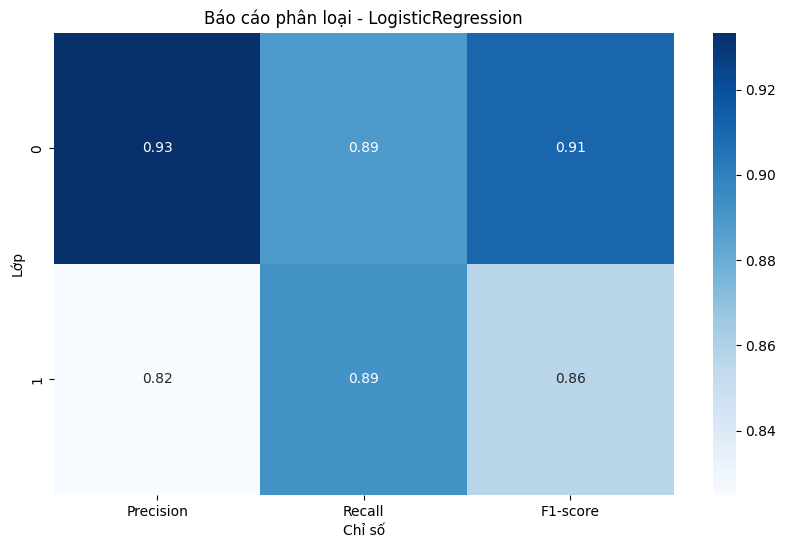

In [ ]:
logistic_param = {
    'penalty': ['l2'],
    'C': [0.1, 1, 5, 10, 20],
    'solver': ['lbfgs', 'newton-cg', 'liblinear'],
    'max_iter': [2000, 3000, 4000]
}

logistic_search = RandomizedSearchCV(LogisticRegression(random_state=42), logistic_param, cv=5, scoring='accuracy', n_jobs=-1)
logistic_search.fit(X_resampled, y_resampled)

best_model_logistic = logistic_search.best_estimator_

# Lưu mô hình
with open('logistic_optimized.pkl', 'wb') as f:
    pickle.dump(best_model_logistic, f)

# Dự đoán trên tập test cho LogisticRegression
y_pred_logistic = best_model_logistic.predict(X_test_encoded)

# Đánh giá mô hình bằng cross-validation cho LogisticRegression
scores_logistic = cross_val_score(best_model_logistic, X_resampled, y_resampled, cv=5, n_jobs=-1)
print("Độ chính xác trung bình của LogisticRegression:", scores_logistic.mean())

# Tính độ chính xác cho LogisticRegression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Độ chính xác của mô hình LogisticRegression:", accuracy_logistic)

# Tạo báo cáo phân loại cho LogisticRegression
report_logistic = classification_report(y_test, y_pred_logistic, output_dict=True)

# Vẽ biểu đồ heatmap từ báo cáo phân loại cho LogisticRegression
labels_logistic = list(report_logistic.keys())[:-3]
data_logistic = [[report_logistic[label]['precision'], report_logistic[label]['recall'], report_logistic[label]['f1-score']] for label in labels_logistic]
data_array_logistic = np.array(data_logistic)

plt.figure(figsize=(10, 6))
sns.heatmap(data_array_logistic, annot=True, fmt=".2f", xticklabels=['Precision', 'Recall', 'F1-score'], yticklabels=labels_logistic, cmap='Blues')
plt.xlabel('Chỉ số')
plt.ylabel('Lớp')
plt.title('Báo cáo phân loại - LogisticRegression')
plt.show()

### **XGBoost**

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Độ chính xác trung bình của XGBoost: 0.8899999999999999
Độ chính xác của mô hình XGBoost: 0.92


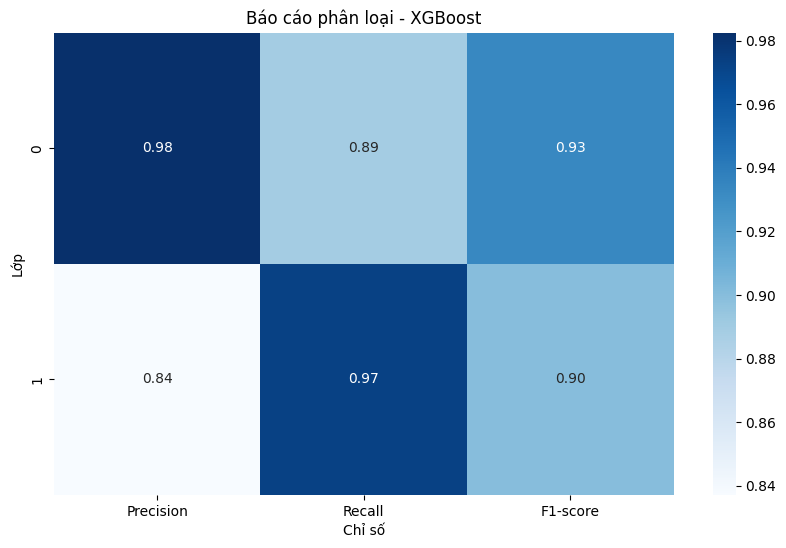

In [ ]:
param_dist_xgb = {
    'n_estimators': [100, 120, 150, 200],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

random_search_xgb = RandomizedSearchCV(estimator=xgb.XGBClassifier(random_state=42),param_distributions=param_dist_xgb,n_iter=10, cv=5, n_jobs=-1, random_state=42)
random_search_xgb.fit(X_resampled, y_resampled)

best_model_xgb = random_search_xgb.best_estimator_

# Lưu mô hình XGBoost
with open('xgboost_optimized.pkl', 'wb') as f:
    pickle.dump(best_model_xgb, f)

# Dự đoán trên tập test
y_pred_xgb = best_model_xgb.predict(X_test_encoded)

# Đánh giá mô hình bằng cross-validation
scores_xgb = cross_val_score(best_model_xgb, X_train_encoded, y_train, cv=5, n_jobs=-1)
print("Độ chính xác trung bình của XGBoost:", scores_xgb.mean())

# Tính độ chính xác
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Độ chính xác của mô hình XGBoost:", accuracy_xgb)

# Tạo báo cáo phân loại cho XGBoost
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)

# Vẽ biểu đồ heatmap từ báo cáo phân loại cho XGBoost
labels_xgb = list(report_xgb.keys())[:-3]
data_xgb = [[report_xgb[label]['precision'], report_xgb[label]['recall'], report_xgb[label]['f1-score']] for label in labels_xgb]
data_array_xgb = np.array(data_xgb)

plt.figure(figsize=(10, 6))
sns.heatmap(data_array_xgb, annot=True, fmt=".2f", xticklabels=['Precision', 'Recall', 'F1-score'], yticklabels=labels_xgb, cmap='Blues')
plt.xlabel('Chỉ số')
plt.ylabel('Lớp')
plt.title('Báo cáo phân loại - XGBoost')
plt.show()

## ***+SCALER +SMOTE +RANDOMIZEDSEARCHCV***

Chuẩn hóa dữ liệu (Scaler) thường được khuyến khích khi xài với model KNN, SVM và LogisticRegression

Chuẩn hóa dữ liệu (Tùy chọn)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [ ]:
scaler

StandardScaler()

Cân bằng dữ liệu (Synthetic Minority Over-sampling Technique/SMOTE) (Tùy chỉnh)

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
smote = BorderlineSMOTE(k_neighbors=5, kind='borderline-1', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
X_train_scaled

array([[ 0.98675438, -0.98675438,  1.8925893 ,  1.52189404],
       [ 0.98675438, -0.98675438,  0.1250379 ,  0.03213212],
       [-1.01342342,  1.01342342,  0.9106163 , -1.31157471],
       ...,
       [ 0.98675438, -0.98675438,  0.5178271 ,  1.84321524],
       [-1.01342342,  1.01342342,  0.1250379 ,  0.20739823],
       [ 0.98675438, -0.98675438, -0.56234321,  0.47029739]])

In [ ]:
X_test_scaled

array([[ 0.98675438, -0.98675438,  0.812419  , -1.39920777],
       [ 0.98675438, -0.98675438,  2.0889839 ,  0.52871943],
       [ 0.98675438, -0.98675438, -0.95513241, -0.75656537],
       [ 0.98675438, -0.98675438,  1.0088136 ,  0.76240757],
       [ 0.98675438, -0.98675438, -0.85693511, -1.22394166],
       [ 0.98675438, -0.98675438, -0.75873781, -0.23076704],
       [ 0.98675438, -0.98675438,  0.9106163 ,  1.08372877],
       [ 0.98675438, -0.98675438, -0.85693511,  0.38266434],
       [-1.01342342,  1.01342342,  0.2232352 ,  0.14897619],
       [-1.01342342,  1.01342342,  0.4196298 , -0.14313399],
       [ 0.98675438, -0.98675438, -0.2677513 , -0.14313399],
       [ 0.98675438, -0.98675438,  1.4998001 , -1.04867555],
       [ 0.98675438, -0.98675438, -1.44611891, -0.6397213 ],
       [ 0.98675438, -0.98675438, -1.74071081, -1.36999675],
       [-1.01342342,  1.01342342, -0.75873781,  0.49950841],
       [-1.01342342,  1.01342342, -0.2677513 ,  1.11293979],
       [ 0.98675438, -0.

In [ ]:
X_resampled

array([[ 0.98675438, -0.98675438,  1.8925893 ,  1.52189404],
       [ 0.98675438, -0.98675438,  0.1250379 ,  0.03213212],
       [-1.01342342,  1.01342342,  0.9106163 , -1.31157471],
       ...,
       [ 0.98675438, -0.98675438,  2.1511948 , -0.88012783],
       [-1.01342342,  1.01342342,  0.15657166,  0.04360258],
       [ 0.98675438, -0.98675438,  2.17831499, -0.74298009]])

In [ ]:
y_resampled

,Purchased
0,1
1,0
2,1
3,0
4,0
...,...
383,1
384,1
385,1
386,1


Tải mã hóa cho mô hình được để dự đoán kết quả qua FastAPI (hoặc dự đoán kết quả qua Mục lục: CHECK KẾT QUẢ/ TEST DỰ ĐOÁN), xem thành quả của mô hình đã được huấn luyện.

In [ ]:
scaler.fit(X_train_encoded)
pickle.dump(scaler, open('Scaler.pkl', 'wb'))

### **DecisionTreeClassifier**

Độ chính xác trung bình của Decision Tree: 0.9045954045954046
Độ chính xác của mô hình Decision Tree: 0.92


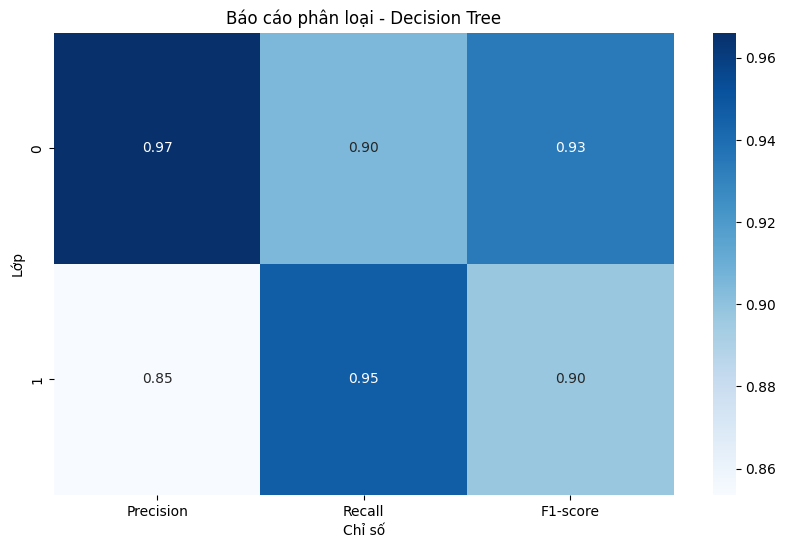

In [ ]:
dt_param = {
    'max_depth': [4],
    'min_samples_split': [2],
    'min_samples_leaf': [3]
}

# Vì tổ hợp tham số chỉ có 1, cụ thể là các tham số trong param, nên sẽ có n_iter=1 trong RandomizedSearchCV
dt_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), dt_param, cv=5, scoring='accuracy', n_jobs=-1, n_iter=1)
dt_search.fit(X_resampled, y_resampled)

best_model_dt = dt_search.best_estimator_

# Lưu mô hình
with open('decision_tree_optimized.pkl', 'wb') as f: #
    pickle.dump(best_model_dt, f)

# Dự đoán trên tập test
y_pred_dt = best_model_dt.predict(X_test_scaled)

# Đánh giá mô hình bằng cross-validation
scores_dt = cross_val_score(best_model_dt, X_resampled, y_resampled, cv=5, n_jobs=-1)
print("Độ chính xác trung bình của Decision Tree:", scores_dt.mean())

# Tính độ chính xác
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Độ chính xác của mô hình Decision Tree:", accuracy_dt)

# Tạo báo cáo phân loại cho Decision Tree
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)

# Vẽ biểu đồ heatmap từ báo cáo phân loại cho Decision Tree
labels_dt = list(report_dt.keys())[:-3]
data_dt = [[report_dt[label]['precision'], report_dt[label]['recall'], report_dt[label]['f1-score']] for label in labels_dt]
data_array_dt = np.array(data_dt)

plt.figure(figsize=(10, 6))
sns.heatmap(data_array_dt, annot=True, fmt=".2f", xticklabels=['Precision', 'Recall', 'F1-score'], yticklabels=labels_dt, cmap='Blues')
plt.xlabel('Chỉ số')
plt.ylabel('Lớp')
plt.title('Báo cáo phân loại - Decision Tree')
plt.show()

### **RandomForestClassifier**

Độ chính xác trung bình của Random Forest: 0.9225774225774226
Độ chính xác của mô hình Random Forest: 0.92


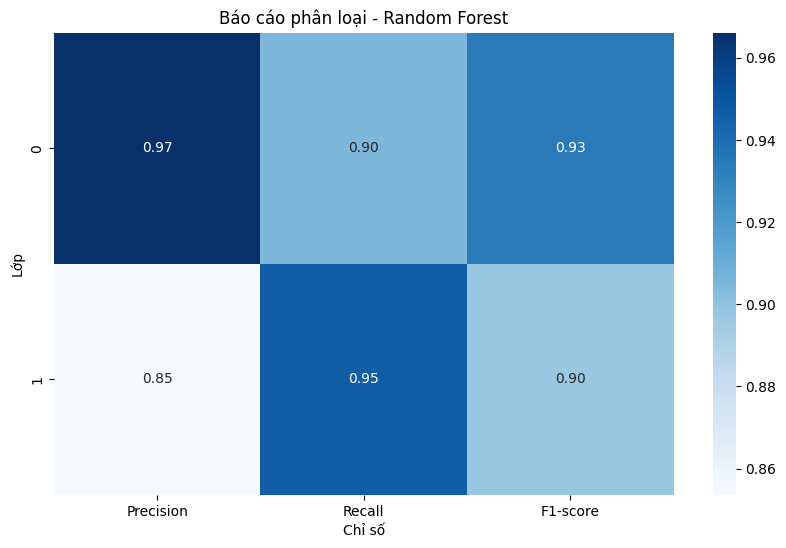

In [ ]:
rf_param = {
    'n_estimators': [50, 100],
    'max_depth': [5, 5, 10], #[None,5,10]
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 5],
    'max_features': ['log2', 'sqrt'],
    'bootstrap': [True, False],
    'class_weight': ['balanced']
}

rf_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_param, cv=5, scoring='accuracy', n_jobs=-1)
rf_search.fit(X_resampled, y_resampled)

best_model_rf = rf_search.best_estimator_

# Lưu mô hình
with open('random_forest_optimized.pkl', 'wb') as f:
    pickle.dump(best_model_rf, f)

# Dự đoán trên tập test
y_pred_rf = best_model_rf.predict(X_test_scaled)

# Đánh giá mô hình bằng cross-validation
scores_rf = cross_val_score(best_model_rf, X_resampled, y_resampled, cv=5, n_jobs=-1)
print("Độ chính xác trung bình của Random Forest:", scores_rf.mean())

# Tính độ chính xác
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Độ chính xác của mô hình Random Forest:", accuracy_rf)

# Tạo báo cáo phân loại cho Random Forest
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Vẽ biểu đồ heatmap từ báo cáo phân loại cho Random Forest
labels_rf = list(report_rf.keys())[:-3]
data_rf = [[report_rf[label]['precision'], report_rf[label]['recall'], report_rf[label]['f1-score']] for label in labels_rf]
data_array_rf = np.array(data_rf)

plt.figure(figsize=(10, 6))
sns.heatmap(data_array_rf, annot=True, fmt=".2f", xticklabels=['Precision', 'Recall', 'F1-score'], yticklabels=labels_rf, cmap='Blues')
plt.xlabel('Chỉ số')
plt.ylabel('Lớp')
plt.title('Báo cáo phân loại - Random Forest')
plt.show()

### **LogisticRegression**

Độ chính xác trung bình của LogisticRegression: 0.8246753246753247
Độ chính xác của mô hình LogisticRegression: 0.87


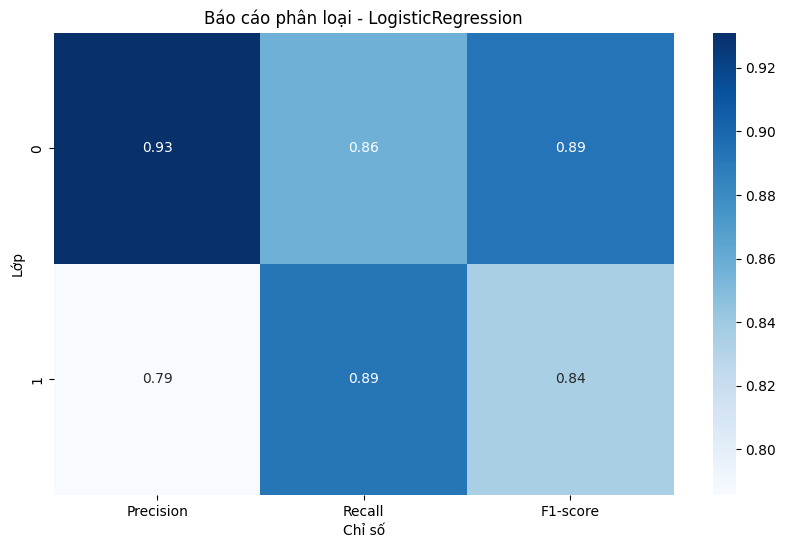

In [ ]:
# LogisticRegression với Randomized Search
logistic_param = {
    'penalty': ['l2'],
    'C': [0.01, 0.1, 1, 5, 10, 20],
    'solver': ['lbfgs', 'newton-cg', 'liblinear'],
    'max_iter': [1000, 2000, 3000],
}

logistic_search = RandomizedSearchCV(LogisticRegression(random_state=42), logistic_param, cv=5, scoring='accuracy', n_jobs=-1)
logistic_search.fit(X_resampled, y_resampled)

best_model_logistic = logistic_search.best_estimator_

# Lưu mô hình
with open('logistic_optimized.pkl', 'wb') as f:
    pickle.dump(best_model_logistic, f)

# Dự đoán trên tập test cho LogisticRegression
y_pred_logistic = best_model_logistic.predict(X_test_scaled)

# Đánh giá mô hình bằng cross-validation cho LogisticRegression
scores_logistic = cross_val_score(best_model_logistic, X_resampled, y_resampled, cv=5, n_jobs=-1)
print("Độ chính xác trung bình của LogisticRegression:", scores_logistic.mean())

# Tính độ chính xác cho LogisticRegression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Độ chính xác của mô hình LogisticRegression:", accuracy_logistic)

# Tạo báo cáo phân loại cho LogisticRegression
report_logistic = classification_report(y_test, y_pred_logistic, output_dict=True)

# Vẽ biểu đồ heatmap từ báo cáo phân loại cho LogisticRegression
labels_logistic = list(report_logistic.keys())[:-3]
data_logistic = [[report_logistic[label]['precision'], report_logistic[label]['recall'], report_logistic[label]['f1-score']] for label in labels_logistic]
data_array_logistic = np.array(data_logistic)

plt.figure(figsize=(10, 6))
sns.heatmap(data_array_logistic, annot=True, fmt=".2f", xticklabels=['Precision', 'Recall', 'F1-score'], yticklabels=labels_logistic, cmap='Blues')
plt.xlabel('Chỉ số')
plt.ylabel('Lớp')
plt.title('Báo cáo phân loại - LogisticRegression')
plt.show()

### **XGBoost**

In [ ]:
param_dist_xgb = {
    'n_estimators': [100, 120, 150, 200],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

random_search_xgb = RandomizedSearchCV(estimator=xgb.XGBClassifier(random_state=42), param_distributions=param_dist_xgb, n_iter=10, cv=5, verbose=1, n_jobs=-1, random_state=42)
random_search_xgb.fit(X_resampled, y_resampled)

best_model_xgb = random_search_xgb.best_estimator_

# Lưu mô hình XGBoost
with open('xgboost_optimized.pkl', 'wb') as f:
    pickle.dump(best_model_xgb, f)

# Dự đoán trên tập test
y_pred_xgb = best_model_xgb.predict(X_test_scaled)

# Đánh giá mô hình bằng cross-validation
scores_xgb = cross_val_score(best_model_xgb, X_resampled, y_resampled, cv=5, n_jobs=-1)
print("Độ chính xác trung bình của XGBoost:", scores_xgb.mean())

# Tính độ chính xác
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Độ chính xác của mô hình XGBoost:", accuracy_xgb)

# Tạo báo cáo phân loại cho XGBoost
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)

# Vẽ biểu đồ heatmap từ báo cáo phân loại cho XGBoost
labels_xgb = list(report_xgb.keys())[:-3]
data_xgb = [[report_xgb[label]['precision'], report_xgb[label]['recall'], report_xgb[label]['f1-score']] for label in labels_xgb]
data_array_xgb = np.array(data_xgb)

plt.figure(figsize=(10, 6))
sns.heatmap(data_array_xgb, annot=True, fmt=".2f", xticklabels=['Precision', 'Recall', 'F1-score'], yticklabels=labels_xgb, cmap='Blues')
plt.xlabel('Chỉ số')
plt.ylabel('Lớp')
plt.title('Báo cáo phân loại - XGBoost')
plt.show()

# **MÔ HÌNH KẾT HỢP**

Chọn một mô hình để kết hợp với XGBoost và SVM, giả sử chọn mô hình RandomForest vì qua các kết quả, RandomForest có hiệu năng tốt nhất.

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline as imbpipeline
import pickle

# Áp dụng SMOTE
smote = SMOTE(random_state=42)

# Khởi tạo các mô hình cơ sở
model_rf = RandomForestClassifier(random_state=42)
model_svm = SVC(random_state=42, probability=True)
model_xgb = xgb.XGBClassifier(random_state=42)

# Các tham số cho RandomizedSearchCV
param_rf = {
    'n_estimators': [100, 120, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

param_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

param_xgb = {
    'n_estimators': [100, 120, 150],
    'learning_rate': [0.01, 0.1, 0.2]
}

# RandomizedSearchCV cho các mô hình
random_search_rf = RandomizedSearchCV(model_rf, param_rf, n_iter=5, scoring='accuracy', cv=5, random_state=42, n_jobs=-1)
random_search_svm = RandomizedSearchCV(model_svm, param_svm, n_iter=5, scoring='accuracy', cv=5, random_state=42, n_jobs=-1)
random_search_xgb = RandomizedSearchCV(model_xgb, param_xgb, n_iter=5, scoring='accuracy', cv=5, random_state=42, n_jobs=-1)

# Tạo pipeline với StandardScaler, SMOTE và các mô hình tìm kiếm
pipeline_rf = imbpipeline(steps=[('scaler', StandardScaler()), ('smote', smote), ('clf', random_search_rf)])
pipeline_svm = imbpipeline(steps=[('scaler', StandardScaler()), ('smote', smote), ('clf', random_search_svm)])
pipeline_xgb = imbpipeline(steps=[('scaler', StandardScaler()), ('smote', smote), ('clf', random_search_xgb)])

# Huấn luyện các mô hình cơ sở với RandomizedSearchCV
pipeline_rf.fit(X_train_encoded, y_train)
pipeline_svm.fit(X_train_encoded, y_train)
pipeline_xgb.fit(X_train_encoded, y_train)

# Khởi tạo mô hình meta (Logistic Regression)
meta_model = RandomForestClassifier(random_state=42)

# Khởi tạo StackingClassifier với các mô hình đã được tìm kiếm
stacked_model = StackingClassifier(
    estimators=[('rf', pipeline_rf), ('svm', pipeline_svm), ('xgb', pipeline_xgb)],
    final_estimator=meta_model, cv=5, n_jobs=-1
)

# Huấn luyện mô hình Stacking
stacked_model.fit(X_train_encoded, y_train)

# Dự đoán trên tập test
y_pred_stacked = stacked_model.predict(X_test_encoded)

# Đánh giá mô hình bằng cross-validation
scores_logistic = cross_val_score(stacked_model, X_train_encoded, y_train, cv=5, n_jobs=-1)
print("Độ chính xác trung bình của LogisticRegression:", scores_logistic.mean())

# Đánh giá mô hình
accuracy_stacked = accuracy_score(y_test, y_pred_stacked)
print("Độ chính xác của mô hình Stacking:", accuracy_stacked)

# Lưu mô hình
with open('stacked_model_with_improvements.pkl', 'wb') as f:
    pickle.dump(stacked_model, f)


Độ chính xác trung bình của LogisticRegression: 0.9
Độ chính xác của mô hình Stacking: 0.93


# **CHECK KẾT QUẢ/ TEST DỰ ĐOÁN**

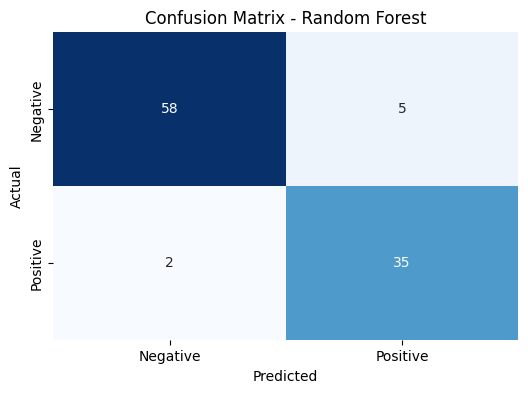

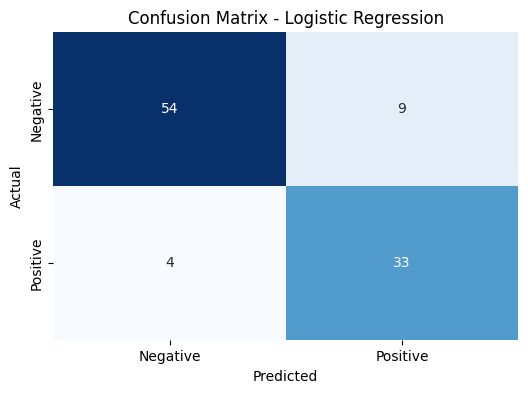

Kết quả dự đoán của Random Forest:
     Actual  Predicted_RF
209       0             1
280       1             1
33        0             0
210       1             1
93        0             0
84        0             0
329       1             1
94        0             0
266       0             0
126       0             0

Kết quả dự đoán của Logistic Regression:
     Actual  Predicted_Logistic
209       0                   0
280       1                   1
33        0                   0
210       1                   1
93        0                   0
84        0                   0
329       1                   1
94        0                   0
266       0                   1
126       0                   1


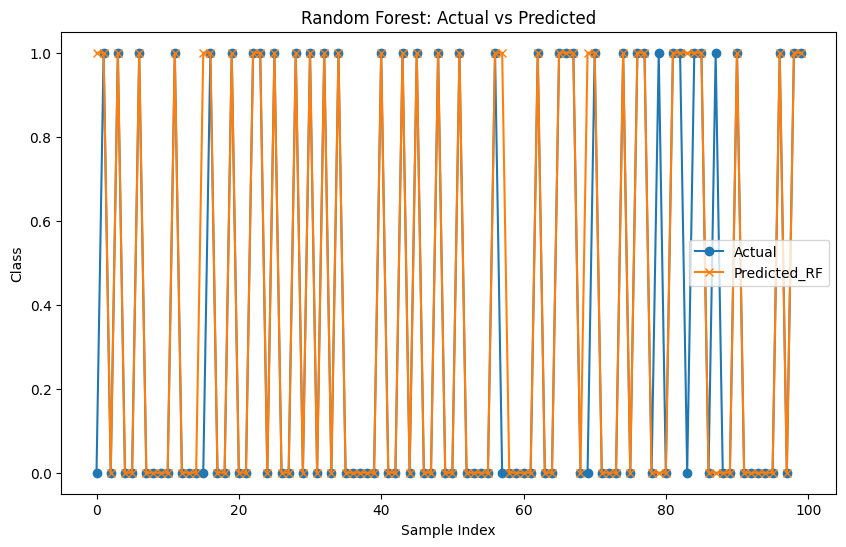

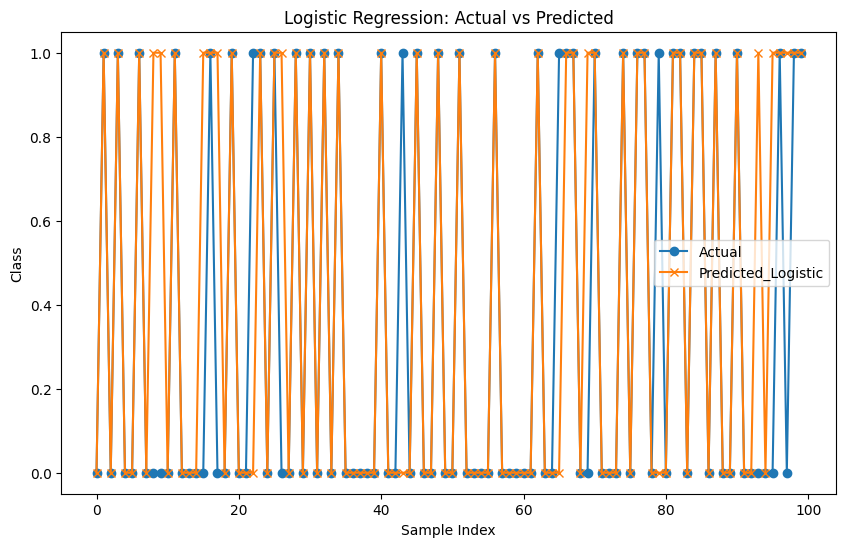

In [ ]:
# Ma trận nhầm lẫn cho Mô hình
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

cm_logistic = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(6,4))
sns.heatmap(cm_logistic, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6,4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()

# Tạo DataFrame chứa giá trị thực và dự đoán cho Mô hình
results_rf = pd.DataFrame({'Actual': y_test, 'Predicted_RF': y_pred_rf})
results_logistic = pd.DataFrame({'Actual': y_test, 'Predicted_Logistic': y_pred_logistic})
results_dt = pd.DataFrame({'Actual': y_test, 'Predicted_DT': y_pred_dt})
results_xgb = pd.DataFrame({'Actual': y_test, 'Predicted_XGB': y_pred_xgb})

# Hiển thị một số kết quả mẫu (10 mẫu đầu tiên)
print("Kết quả dự đoán của Random Forest:")
print(results_rf.head(10))
print("\nKết quả dự đoán của Logistic Regression:")
print(results_logistic.head(10))
print("\nKết quả dự đoán của Decision Tree:")
print(results_dt.head(10))
print("\nKết quả dự đoán của XGBoost:")
print(results_xgb.head(10))

# Trực quan hóa dự đoán của Mô hình so với giá trị thực
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label="Actual", marker='o')
plt.plot(range(len(y_pred_rf)), y_pred_rf, label="Predicted_RF", marker='x')
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label="Actual", marker='o')
plt.plot(range(len(y_pred_logistic)), y_pred_logistic, label="Predicted_Logistic", marker='x')
plt.title('Logistic Regression: Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label="Actual", marker='o')
plt.plot(range(len(y_pred_dt)), y_pred_dt, label="Predicted_DT", marker='x')
plt.title('Decision Tree: Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label="Actual", marker='o')
plt.plot(range(len(y_pred_xgb)), y_pred_xgb, label="Predicted_XGB", marker='x')
plt.title('XGBoost: Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.legend()
plt.show()

Kiểm tra mô hình được lưu

In [ ]:
with open('random_forest_optimized.pkl', 'rb') as f:
    model_rf = pickle.load(f)
with open('logistic_optimized.pkl', 'rb') as f:
    model_logistic = pickle.load(f)
with open('decision_tree_optimized.pkl', 'rb') as f:
    model_dt = pickle.load(f)
with open('xgb_optimized.pkl', 'rb') as f:
    model_xgb = pickle.load(f)
with open('svm_optimized.pkl', 'rb') as f:
    model_svm = pickle.load(f)

# Dự đoán trên tập dữ liệu kiểm tra có Scaler
y_pred_rf = model_rf.predict(X_test_scaled)
y_pred_logistic = model_logistic.predict(X_test_scaled)
y_pred_dt = model_dt.predict(X_test_scaled)
y_pred_xgb = model_xgb.predict(X_test_scaled)
y_pred_svm = model_svm.predict(X_test_scaled)

# Dự đoán trên tập dữ liệu kiểm tra không Scaler
# y_pred_rf = model_rf.predict(X_test_encoded)
# y_pred_logistic = model_logistic.predict(X_test_encoded)
# y_pred_dt = model_dt.predict(X_test_encoded)
# y_pred_xgb = model_xgb.predict(X_test_encoded)
# y_pred_svm = model_svm.predict(X_test_encoded)

# Ma trận nhầm lẫn cho mô hình đã load
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_svm = confusion_matrix(y_test, y_pred_svm)

print("Confusion Matrix - Random Forest:")
print(cm_rf)

print("\nConfusion Matrix - Logistic Regression:")
print(cm_logistic)

print("\nConfusion Matrix - Decision Tree:")
print(cm_dt)

print("\nConfusion Matrix - XGBoost:")
print(cm_xgb)

print("\nConfusion Matrix - SVM:")
print(cm_svm)

# Báo cáo phân loại
print("\nClassification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf))

print("\nClassification Report - Logistic Regression:")
print(classification_report(y_test, y_pred_logistic))

print("\nClassification Report - Decision Tree:")
print(classification_report(y_test, y_pred_dt))

print("\nClassification Report - XGBoost:")
print(classification_report(y_test, y_pred_xgb))

print("\nClassification Report - SVM:")
print(classification_report(y_test, y_pred_svm))


Confusion Matrix - Random Forest:
[[58  5]
 [ 2 35]]

Confusion Matrix - Logistic Regression:
[[ 4 59]
 [ 0 37]]

Confusion Matrix - Decision Tree:
[[21 42]
 [ 0 37]]

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        63
           1       0.88      0.95      0.91        37

    accuracy                           0.93       100
   macro avg       0.92      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.06      0.12        63
           1       0.39      1.00      0.56        37

    accuracy                           0.41       100
   macro avg       0.69      0.53      0.34       100
weighted avg       0.77      0.41      0.28       100


Classification Report - Decision Tree:
              precision    recall  f1-score   support